**Análisis de datos - Data engineering with python**

- [¿Cuáles son los ingresos por departamento?](#Pregunta-1)
- [¿Cuáles son las categorías más compradas? (identificar el nombre de la categoría)?](#Pregunta-2)
- [¿Quiénes son el top 10 de clientes que generan más compras para fidelizarlos?](#Pregunta-3)
- [¿Cuales son las ventas historicas realizadas?](#Pregunta-4)


# Pregunta 1

In [40]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="AFern1091#",
  database="datapath_project"
)

df = pd.read_sql('SELECT * FROM order_items INNER JOIN products ON order_items.order_item_product_id=products.product_id INNER JOIN categories ON products.product_category_id=categories.category_id INNER JOIN departments ON categories.category_department_id=departments.department_id INNER JOIN orders ON order_items.order_item_order_id=orders.order_id INNER JOIN customers ON customers.customer_id=orders.order_customer_id', con=mydb)
df.head()

/home/aaron/anaconda3/envs/datapath_env/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,order_item_id,order_item_order_id,order_item_product_id,order_item_quantity,order_item_subtotal,order_item_product_price,product_id,product_category_id,product_name,product_description,...,order_status,customer_id,customer_fname,customer_lname,customer_email,customer_password,customer_street,customer_city,customer_state,customer_zipcode
0,57439,22945,191,5,499.95,99.99,191,9,Nike Men's Free 5.0+ Running Shoe,,...,COMPLETE,1,Richard,Hernandez,XXXXXXXXX,XXXXXXXXX,6303 Heather Plaza,Brownsville,TX,78521
1,38007,15192,1014,2,99.96,49.98,1014,46,O'Brien Men's Neoprene Life Vest,,...,PENDING_PAYMENT,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
2,84536,33865,957,1,299.98,299.98,957,43,Diamondback Women's Serene Classic Comfort Bi,,...,COMPLETE,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
3,84537,33865,1073,1,199.99,199.99,1073,48,Pelican Sunstream 100 Kayak,,...,COMPLETE,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126
4,84538,33865,502,1,50.00,50.00,502,24,Nike Men's Dri-FIT Victory Golf Polo,,...,COMPLETE,2,Mary,Barrett,XXXXXXXXX,XXXXXXXXX,9526 Noble Embers Ridge,Littleton,CO,80126


In [41]:
print(df.shape)

(172198, 30)


In [42]:
print(df.columns)

Index(['order_item_id', 'order_item_order_id', 'order_item_product_id',
       'order_item_quantity', 'order_item_subtotal',
       'order_item_product_price', 'product_id', 'product_category_id',
       'product_name', 'product_description', 'product_price', 'product_image',
       'category_id', 'category_department_id', 'category_name',
       'department_id', 'department_name', 'order_id', 'order_date',
       'order_customer_id', 'order_status', 'customer_id', 'customer_fname',
       'customer_lname', 'customer_email', 'customer_password',
       'customer_street', 'customer_city', 'customer_state',
       'customer_zipcode'],
      dtype='object')


In [55]:
q1 = df.groupby('department_name')[["order_item_subtotal"]].sum().reset_index().sort_values(by="order_item_subtotal",ascending=False)
q1

,department_name,order_item_subtotal
1,Fan Shop,17107765.88
0,Apparel,7323700.20
4,Golf,4609028.22
3,Footwear,4006498.77
5,Outdoors,995582.72
2,Fitness,280044.14


In [76]:
def add_value_label(x_list,y_list):
    for i in range(1, 4):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center",color='red')

In [58]:
department = q1["department_name"].values.tolist()
total = q1["order_item_subtotal"].values.tolist()

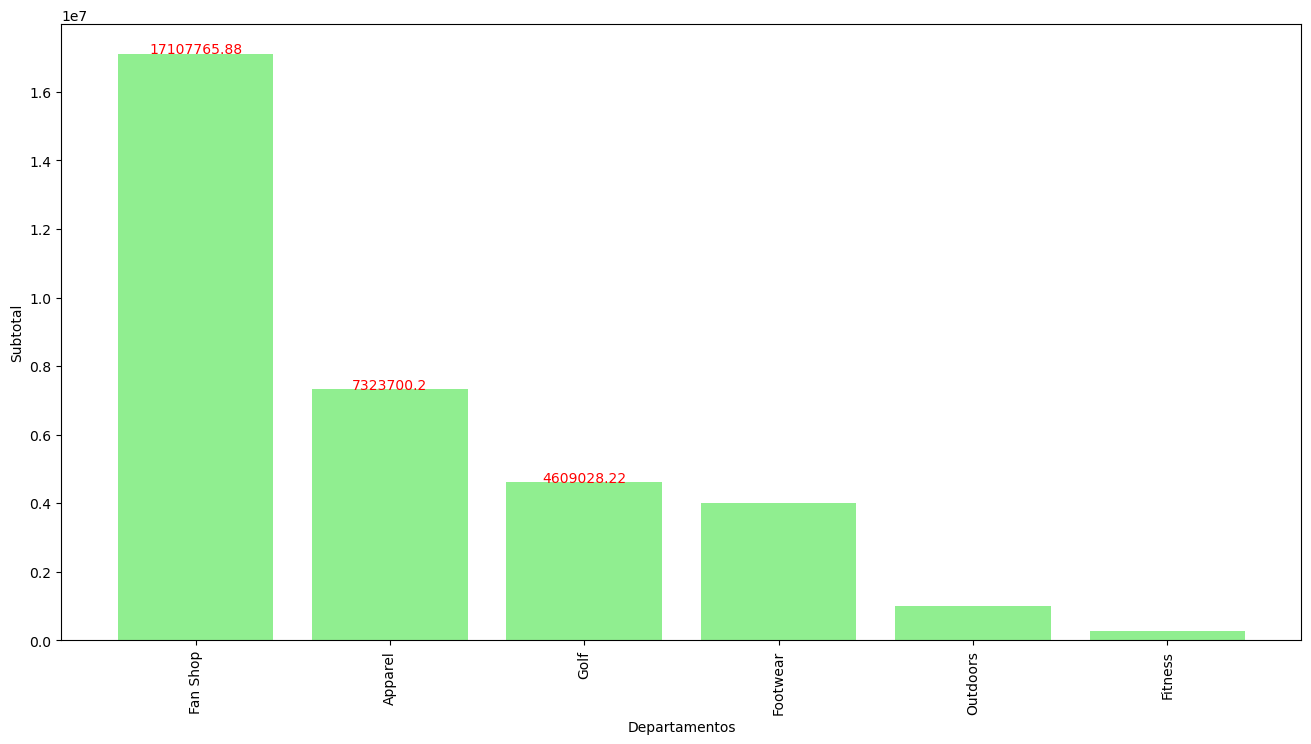

In [89]:
plt.figure(figsize=(16,8))
plt.bar(department,total,color="lightgreen")
add_value_label(department,total)
plt.xticks(rotation=90)
plt.ylabel("Subtotal")
plt.xlabel("Departamentos")
plt.show()

# Pregunta 2

In [65]:
q2 = df.groupby('category_name')[["order_item_quantity"]].sum().sort_values(by="order_item_quantity",ascending=False).reset_index()
q2

,category_name,order_item_quantity
0,Cleats,73734
1,Women's Apparel,62956
2,Indoor/Outdoor Games,57803
3,Cardio Equipment,37587
4,Shop By Sport,32726
5,Men's Footwear,22246
6,Fishing,17325
7,Water Sports,15540
8,Camping & Hiking,13729
9,Electronics,9436


In [67]:
category = q2["category_name"].values.tolist()
quantity = q2["order_item_quantity"].values.tolist()

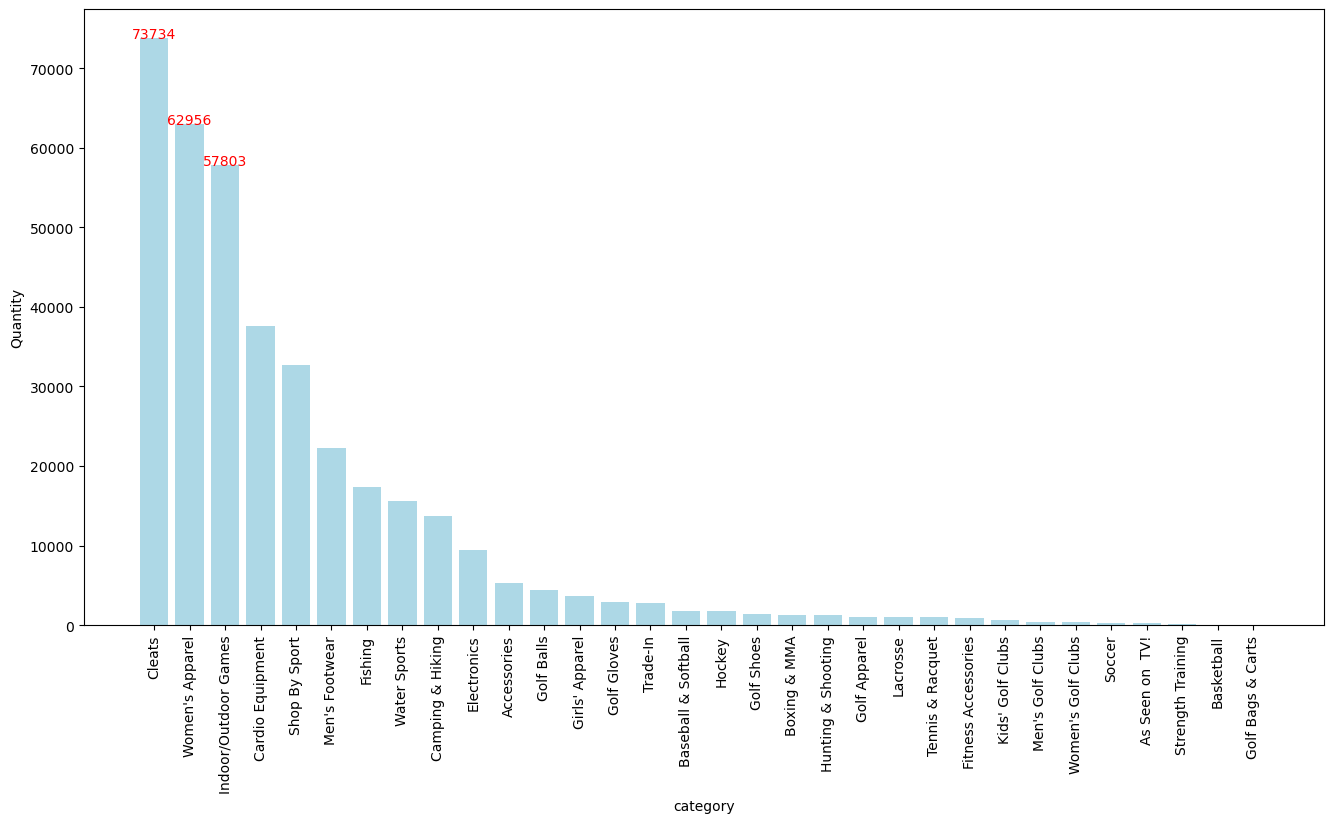

In [88]:
plt.figure(figsize=(16,8))
plt.bar(category,quantity,color="lightblue")
add_value_label(category,quantity)
plt.xticks(rotation=90)
plt.ylabel("Quantity")
plt.xlabel("category")
plt.show()

# Pregunta 3

In [92]:
q3 = df.groupby(['customer_id','customer_fname','customer_lname'])[['order_item_quantity']].sum().sort_values(by='order_item_quantity',ascending=False).reset_index()[:10]
q3['Customer'] = q3['customer_fname'] + ' ' + q3['customer_lname']
q3

,customer_id,customer_fname,customer_lname,order_item_quantity,Customer
0,5004,Dorothy,Friedman,114,Dorothy Friedman
1,1657,Betty,Phillips,111,Betty Phillips
2,12284,Mary,Smith,110,Mary Smith
3,5654,Jerry,Smith,103,Jerry Smith
4,6050,Rebecca,Arnold,101,Rebecca Arnold
5,11065,Aaron,Smith,101,Aaron Smith
6,6285,Mary,Garcia,100,Mary Garcia
7,5715,Kelly,Smith,99,Kelly Smith
8,10591,Deborah,Humphrey,99,Deborah Humphrey
9,1920,Stephanie,Archer,95,Stephanie Archer


In [93]:
customer = q3["Customer"].values.tolist()
quantity = q3["order_item_quantity"].values.tolist()

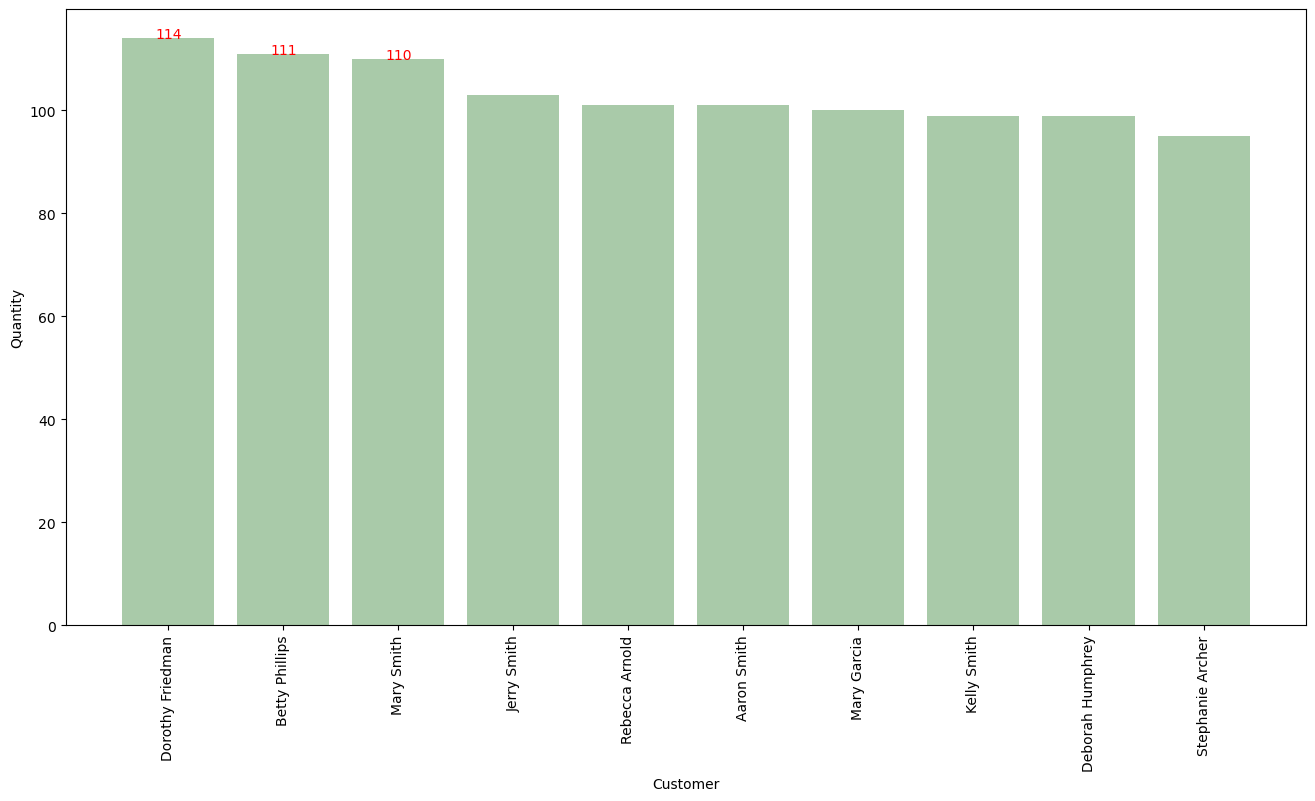

In [97]:
plt.figure(figsize=(16,8))
plt.bar(customer,quantity,color="#A9CAA9")
add_value_label(customer,quantity)
plt.xticks(rotation=90)
plt.ylabel("Quantity")
plt.xlabel("Customer")
plt.show()

# Pregunta 4

In [101]:
q4 = df.groupby('order_date')[['order_item_quantity']].sum().reset_index()
q4["order_date"] = pd.to_datetime(q4["order_date"])
q4 = q4.sort_values(by='order_date')
q4

,order_date,order_item_quantity
0,2013-07-25,741
1,2013-07-26,1511
2,2013-07-27,1057
3,2013-07-28,955
4,2013-07-29,1518
...,...,...
359,2014-07-20,1474
360,2014-07-21,1339
361,2014-07-22,749
362,2014-07-23,912


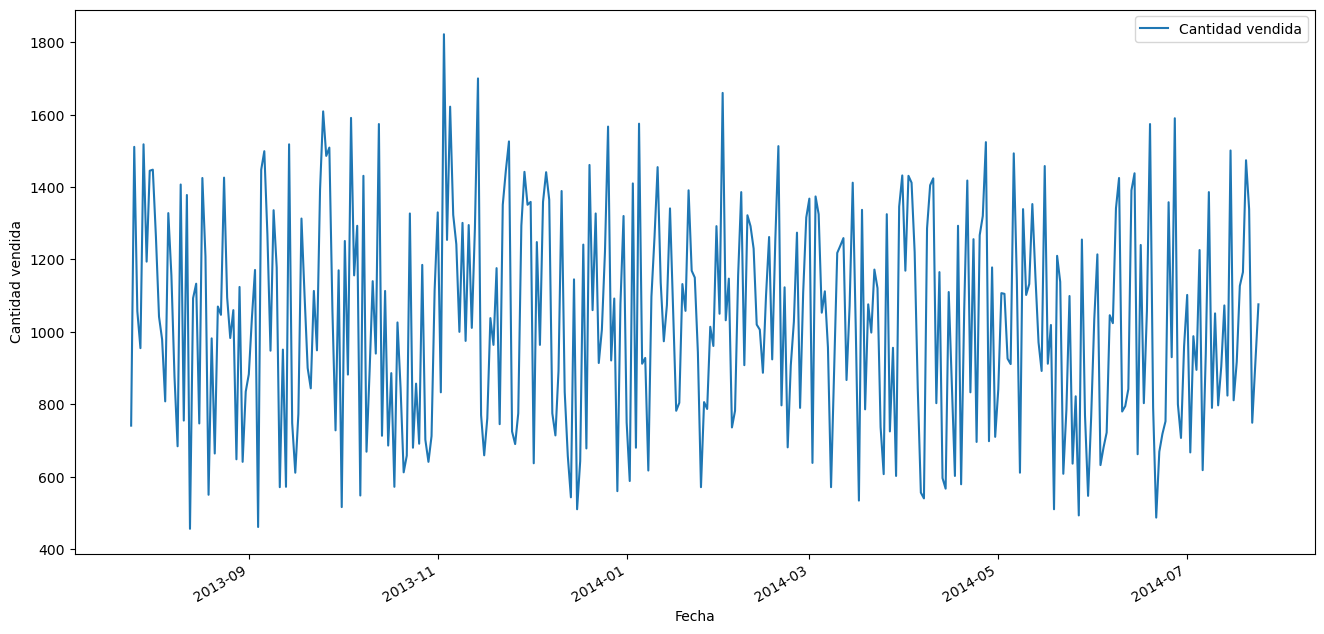

In [134]:
q4.plot(x='order_date',y='order_item_quantity',kind='line',label='Cantidad vendida',figsize=(16,8))
plt.xlabel('Fecha')
plt.ylabel('Cantidad vendida')
plt.show()